<a href="https://colab.research.google.com/github/Akshays1999/AkshayS/blob/main/Loan%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [122]:
train = pd.read_csv("/train_ctrUa4K.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [123]:
test = pd.read_csv("/test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [124]:
train_original=train.copy()
test_original=test.copy()

In [84]:
train.shape

(614, 13)

In [85]:
test.shape

(367, 12)

In [86]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [87]:
train.drop_duplicates(keep='first', inplace=True)
train.shape

(614, 13)

In [88]:
test.drop_duplicates(keep='first', inplace=True)
test.shape

(367, 12)

In [89]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [90]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

Data Analysis

In [95]:
cols = train.columns
cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status','Loan_Amount_Term']

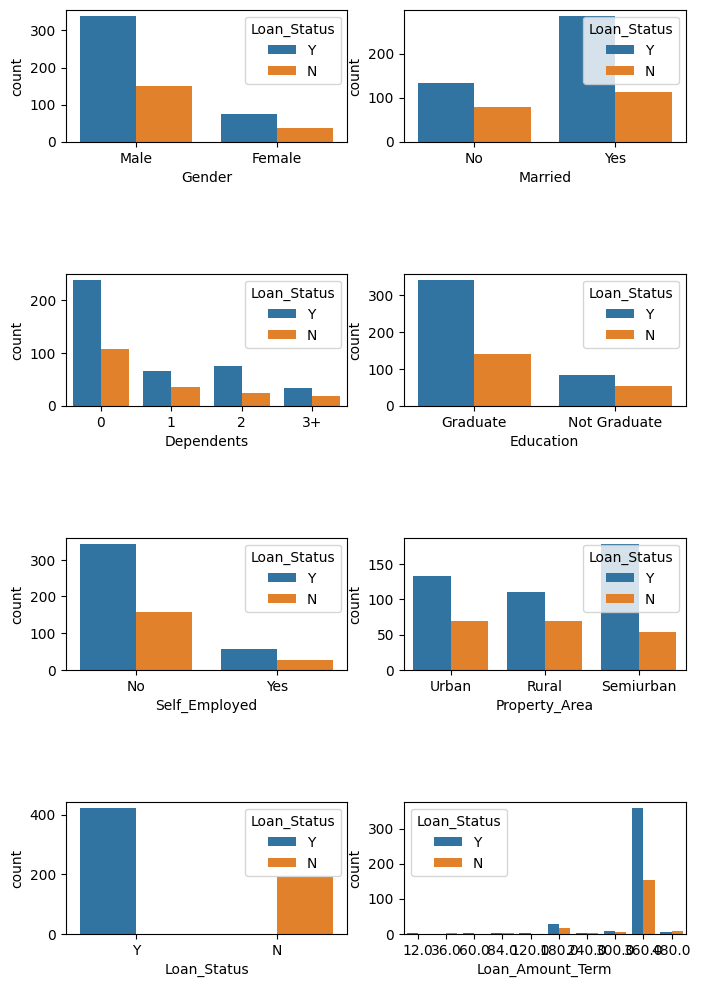

In [96]:
fig,axes = plt.subplots(4,2,figsize=(8,12))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [97]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


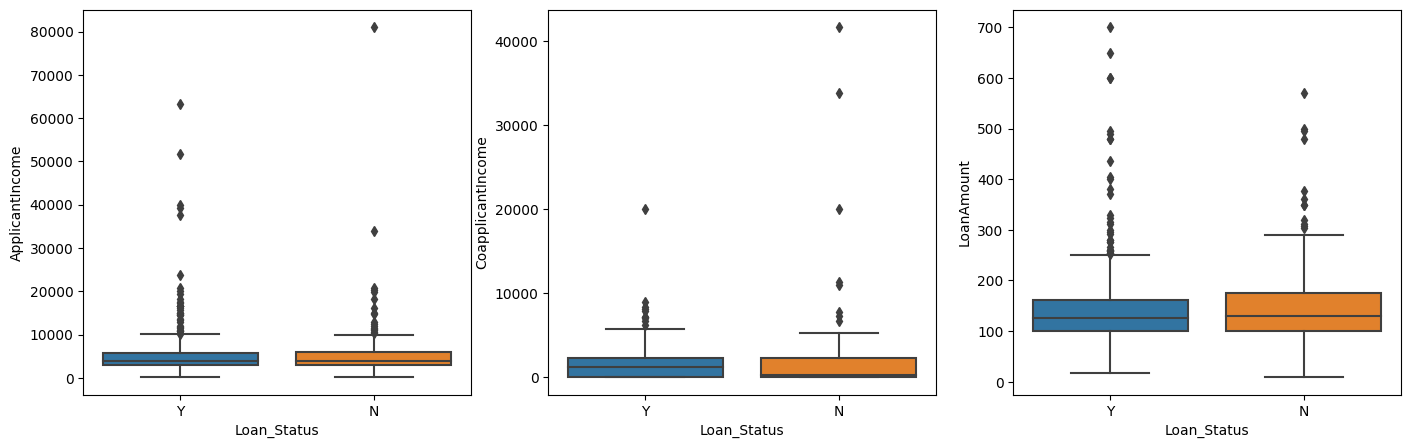

In [98]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,num_col in enumerate(numerical_columns):
    sns.boxplot(y=num_col,data=train,x='Loan_Status',ax=axes[idx])

print(train[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

Replacing Categorical values with Binery values

In [99]:
train.Gender=train.Gender.map({"Female":0,"Male":1})
train.Married=train.Married.map({"No":0,"Yes":1})
train.Self_Employed=train.Self_Employed.map({"No":0,"Yes":1})
train.Education=train.Education.map({"Not":1,"Graduate":0})
train.Property_Area=train.Property_Area.map({"Urban":0,"Rural":1})
train.Loan_Status=train.Loan_Status.map({"N":0,"Y":1})
train.Dependents=train.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [100]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,0.0,1
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,1
3,LP001006,1.0,1.0,0.0,NaN,0.0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,1


In [101]:
test.Gender=test.Gender.map({"Female":0,"Male":1})
test.Married=test.Married.map({"No":0,"Yes":1})
test.Self_Employed=test.Self_Employed.map({"No":0,"Yes":1})
test.Education=test.Education.map({"Not":1,"Graduate":0})
test.Property_Area=test.Property_Area.map({"Urban":0,"Rural":1})
test.Dependents=test.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [102]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,0.0,0.0,5720,0,110.0,360.0,1.0,0.0
1,LP001022,1.0,1,1.0,0.0,0.0,3076,1500,126.0,360.0,1.0,0.0
2,LP001031,1.0,1,2.0,0.0,0.0,5000,1800,208.0,360.0,1.0,0.0
3,LP001035,1.0,1,2.0,0.0,0.0,2340,2546,100.0,360.0,NaN,0.0
4,LP001051,1.0,0,0.0,NaN,0.0,3276,0,78.0,360.0,1.0,0.0


Filling Missing values

In [103]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
train["Education"].fillna(train["Education"].mode()[0],inplace=True)
train["Property_Area"].fillna(train["Property_Area"].mode()[0],inplace=True)

In [104]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [105]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,0.0,1
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,1
3,LP001006,1.0,1.0,0.0,0.0,0.0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,1


In [107]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test["Married"].fillna(test["Married"].mode()[0],inplace=True)
test["Dependents"].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["Education"].fillna(test["Education"].mode()[0],inplace=True)
test["Property_Area"].fillna(test["Property_Area"].mode()[0],inplace=True)

In [108]:
test["Loan_Amount_Term"].value_counts()
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [109]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,0.0,0.0,5720,0,110.0,360.0,1.0,0.0
1,LP001022,1.0,1,1.0,0.0,0.0,3076,1500,126.0,360.0,1.0,0.0
2,LP001031,1.0,1,2.0,0.0,0.0,5000,1800,208.0,360.0,1.0,0.0
3,LP001035,1.0,1,2.0,0.0,0.0,2340,2546,100.0,360.0,1.0,0.0
4,LP001051,1.0,0,0.0,0.0,0.0,3276,0,78.0,360.0,1.0,0.0


Feature Calculation

In [110]:
train['Total_Income']=train["ApplicantIncome"]+train['CoapplicantIncome']
test['Total_Income']=test["ApplicantIncome"]+test['CoapplicantIncome']

In [111]:
train['Total_Income_log']=np.log(train["Total_Income"])
test['Total_Income_log']=np.log(test["Total_Income"])
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,0.0,1,5849.0,8.674026
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,0,6091.0,8.714568
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,1,3000.0,8.006368
3,LP001006,1.0,1.0,0.0,0.0,0.0,2583,2358.0,120.0,360.0,1.0,0.0,1,4941.0,8.505323
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,1,6000.0,8.699515


In [112]:
train=train.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","Loan_Amount_Term"],axis=1)
train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log
0,1.0,0.0,0.0,0.0,0.0,128.0,1.0,0.0,1,5849.0,8.674026
1,1.0,1.0,1.0,0.0,0.0,128.0,1.0,1.0,0,6091.0,8.714568
2,1.0,1.0,0.0,0.0,1.0,66.0,1.0,0.0,1,3000.0,8.006368
3,1.0,1.0,0.0,0.0,0.0,120.0,1.0,0.0,1,4941.0,8.505323
4,1.0,0.0,0.0,0.0,0.0,141.0,1.0,0.0,1,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,71.0,1.0,1.0,1,2900.0,7.972466
610,1.0,1.0,3.0,0.0,0.0,40.0,1.0,1.0,1,4106.0,8.320205
611,1.0,1.0,1.0,0.0,0.0,253.0,1.0,0.0,1,8312.0,9.025456
612,1.0,1.0,2.0,0.0,0.0,187.0,1.0,0.0,1,7583.0,8.933664


In [113]:
test=test.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","Loan_Amount_Term",],axis=1)
test

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Total_Income,Total_Income_log
0,1.0,1,0.0,0.0,0.0,110.0,1.0,0.0,5720,8.651724
1,1.0,1,1.0,0.0,0.0,126.0,1.0,0.0,4576,8.428581
2,1.0,1,2.0,0.0,0.0,208.0,1.0,0.0,6800,8.824678
3,1.0,1,2.0,0.0,0.0,100.0,1.0,0.0,4886,8.494129
4,1.0,0,0.0,0.0,0.0,78.0,1.0,0.0,3276,8.094378
...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3.0,0.0,1.0,113.0,1.0,0.0,5786,8.663196
363,1.0,1,0.0,0.0,0.0,115.0,1.0,0.0,4867,8.490233
364,1.0,0,0.0,0.0,0.0,126.0,1.0,0.0,5243,8.564649
365,1.0,1,0.0,0.0,0.0,158.0,1.0,1.0,7393,8.908289


In [114]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [115]:
x=train.drop("Loan_Status",1)
y=train.Loan_Status

<ipython-input-115-05d1accd4fa4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=train.drop("Loan_Status",1)


In [116]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [118]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(x_train,y_train)
pred_l=logmodel.predict(x_test)
acc_l=accuracy_score(y_test,pred_l)*100
acc_l

83.24324324324324

In [119]:
pred_test=logmodel.predict(test)

Sample file

In [125]:
loancsv=pd.DataFrame({"Loan_ID":test_original["Loan_ID"],"Loan_Status":pred_test})

In [126]:
loancsv

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [127]:
loancsv["Loan_Status"].replace(0,"N",inplace=True)
loancsv["Loan_Status"].replace(1,"Y",inplace=True)
loancsv

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [128]:
loancsv.to_csv("sample_submission.csv",index=False)